# EDA


In [1]:
# With BigQuery DataFrames, you can use many familiar Pandas methods, but the
# processing happens BigQuery rather than the runtime, allowing you to work with larger
# DataFrames that would otherwise not fit in the runtime memory.
# Learn more here: https://cloud.google.com/python/docs/reference/bigframes/latest

import bigframes.pandas as bf

bf.options.bigquery.location = "US" #this variable is set based on the dataset you chose to query
bf.options.bigquery.project = "ml4-project" #this variable is set based on the dataset you chose to query

In [2]:
df = bf.read_gbq("ml4-project.mimic.filtered_data") #this variable is set based on the dataset you chose to query

In [3]:
# BigFrames can work with tables that are too large to fit in the notebook memory.
# Look at the first 20 rows.
df.head(1)

,subject_id,hadm_id,charttime,HeartRate,SysBP,DiasBP,MeanBP,RespRate,TempC,SpO2,...,diagnosis,ETHNICITY,MARITAL_STATUS,RELIGION,GENDER,DOB,DOD,age,rank,age_1
0,52342,159504,2178-09-19 00:00:00,91.0,<NA>,<NA>,<NA>,19.0,<NA>,93.0,...,ESOPHAGEAL VARICIES,WHITE,<NA>,CATHOLIC,M,2130-11-22 00:00:00,2179-02-14 00:00:00,<NA>,1,48


In [4]:
df.columns

Index(['subject_id', 'hadm_id', 'charttime', 'HeartRate', 'SysBP', 'DiasBP',
       'MeanBP', 'RespRate', 'TempC', 'SpO2', 'Glucose', 'admittime',
       'dischtime', 'deathtime', 'diagnosis', 'ETHNICITY', 'MARITAL_STATUS',
       'RELIGION', 'GENDER', 'DOB', 'DOD', 'age', 'rank', 'age_1'],
      dtype='object')

In [5]:
# Check if each subject_id has a unique hadm_id
unique_hadm_check = df.groupby('subject_id')['hadm_id'].nunique()

# Identify any subjects with more than one unique hadm_id
multiple_hadm_ids = unique_hadm_check[unique_hadm_check > 1]

# Display results
if multiple_hadm_ids.empty:
    print("Each subject has a unique hadm_id.")
else:
    print("Some subjects have more than one hadm_id:")
    print(multiple_hadm_ids)


Each subject has a unique hadm_id.


In [6]:
print(df.dtypes)

subject_id                         Int64
hadm_id                            Int64
charttime         timestamp[us][pyarrow]
HeartRate                        Float64
SysBP                            Float64
DiasBP                           Float64
MeanBP                           Float64
RespRate                         Float64
TempC                            Float64
SpO2                             Float64
Glucose                          Float64
admittime         timestamp[us][pyarrow]
dischtime         timestamp[us][pyarrow]
deathtime         timestamp[us][pyarrow]
diagnosis                string[pyarrow]
ETHNICITY                string[pyarrow]
MARITAL_STATUS           string[pyarrow]
RELIGION                 string[pyarrow]
GENDER                   string[pyarrow]
DOB               timestamp[us][pyarrow]
DOD               timestamp[us][pyarrow]
age                                Int64
rank                               Int64
age_1                              Int64
dtype: object


In [7]:
print(df.isnull().sum())

/usr/local/lib/python3.10/dist-packages/bigframes/core/blocks.py:140: NullIndexPreviewWarning: Creating object with Null Index. Null Index is a preview feature.
  warnings.warn(


subject_id              0
hadm_id                 0
charttime               0
HeartRate          892087
SysBP             1161491
DiasBP            1162757
MeanBP            1149132
RespRate           860420
TempC             4106324
SpO2               994339
Glucose           4484259
admittime               0
dischtime               0
deathtime         4475152
diagnosis             113
ETHNICITY               0
MARITAL_STATUS     329317
RELIGION            66243
GENDER                  0
DOB                     0
DOD               2846410
age               1628742
rank                    0
age_1                   0
dtype: Int64


In [8]:
df_pandas = df.to_pandas()

In [9]:
# Read the unique subject IDs from the text file and save them in a list
with open('unique_subjects.txt', 'r') as f:
    unique_subjects_list = [line.strip() for line in f.readlines()]

# Print the unique subject IDs list
print(unique_subjects_list)

['3', '6', '9', '12', '13', '17', '21', '25', '31', '32', '35', '38', '41', '43', '44', '62', '64', '68', '71', '85', '91', '96', '97', '100', '101', '105', '106', '109', '111', '115', '124', '127', '130', '132', '133', '134', '137', '141', '142', '143', '144', '145', '146', '147', '148', '156', '161', '164', '170', '171', '174', '177', '179', '186', '191', '195', '198', '201', '205', '208', '209', '211', '214', '221', '223', '225', '228', '231', '234', '236', '238', '241', '243', '245', '248', '249', '250', '252', '261', '265', '267', '268', '269', '270', '274', '275', '279', '281', '283', '285', '286', '287', '290', '294', '298', '305', '306', '307', '308', '313', '314', '315', '318', '319', '322', '323', '325', '326', '328', '329', '330', '339', '340', '344', '346', '347', '350', '351', '353', '354', '357', '359', '360', '364', '376', '377', '383', '384', '388', '391', '394', '395', '397', '400', '402', '405', '407', '408', '409', '412', '413', '414', '416', '418', '421', '422', '42

In [16]:
len(unique_subjects_list)
int_list = [int(i) for i in unique_subjects_list]  # Convert to int list
print(int_list)

[3, 6, 9, 12, 13, 17, 21, 25, 31, 32, 35, 38, 41, 43, 44, 62, 64, 68, 71, 85, 91, 96, 97, 100, 101, 105, 106, 109, 111, 115, 124, 127, 130, 132, 133, 134, 137, 141, 142, 143, 144, 145, 146, 147, 148, 156, 161, 164, 170, 171, 174, 177, 179, 186, 191, 195, 198, 201, 205, 208, 209, 211, 214, 221, 223, 225, 228, 231, 234, 236, 238, 241, 243, 245, 248, 249, 250, 252, 261, 265, 267, 268, 269, 270, 274, 275, 279, 281, 283, 285, 286, 287, 290, 294, 298, 305, 306, 307, 308, 313, 314, 315, 318, 319, 322, 323, 325, 326, 328, 329, 330, 339, 340, 344, 346, 347, 350, 351, 353, 354, 357, 359, 360, 364, 376, 377, 383, 384, 388, 391, 394, 395, 397, 400, 402, 405, 407, 408, 409, 412, 413, 414, 416, 418, 421, 422, 423, 424, 429, 433, 434, 437, 439, 441, 443, 445, 448, 452, 453, 454, 457, 462, 468, 471, 472, 477, 479, 480, 482, 485, 487, 489, 492, 497, 500, 501, 503, 507, 508, 509, 510, 511, 515, 518, 528, 530, 533, 538, 540, 543, 544, 545, 546, 549, 551, 559, 561, 565, 571, 577, 585, 586, 588, 589, 590, 

In [18]:
df_72 = df_pandas[df_pandas['subject_id'].isin(int_list)]
print(df_72.isnull().mean())

subject_id        0.000000
hadm_id           0.000000
charttime         0.000000
HeartRate         0.162423
SysBP             0.214841
DiasBP            0.215065
MeanBP            0.211570
RespRate          0.153758
TempC             0.756572
SpO2              0.177244
Glucose           0.823707
admittime         0.000000
dischtime         0.000000
deathtime         0.805450
diagnosis         0.000024
ETHNICITY         0.000000
MARITAL_STATUS    0.062239
RELIGION          0.012470
GENDER            0.000000
DOB               0.000000
DOD               0.498800
age               0.306650
rank              0.000000
age_1             0.000000
dtype: float64


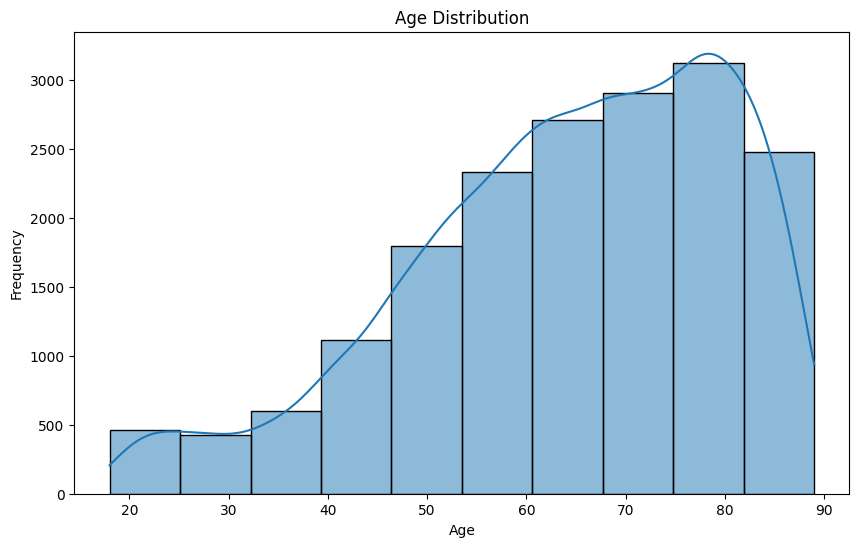

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the first available age for each subject_id
unique_ages = df_72.groupby('subject_id')['age_1'].first()

# Plot the distribution of ages (each subject_id counted once)
plt.figure(figsize=(10, 6))
sns.histplot(unique_ages, kde=True, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


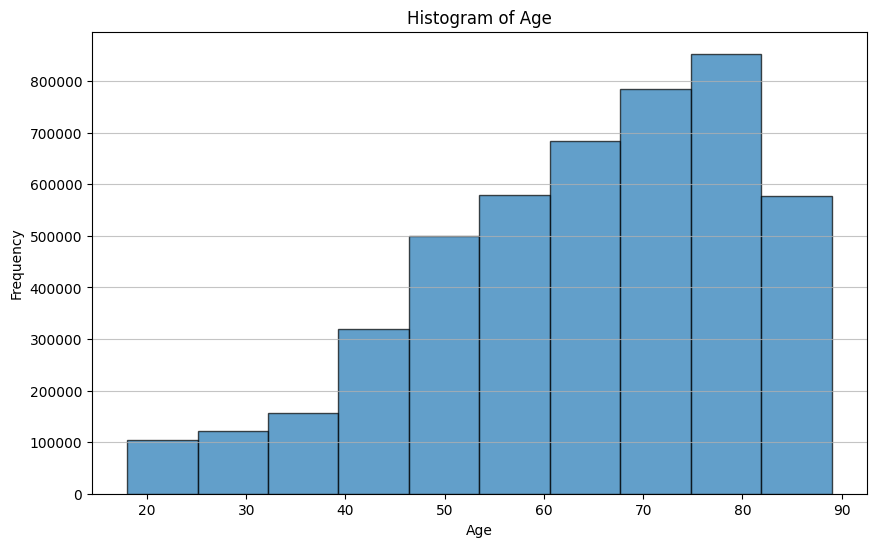

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Set figure size
plt.hist(df_72['age_1'], bins=10, edgecolor='black', alpha=0.7)  # Create histogram
plt.title('Histogram of Age')  # Title of the histogram
plt.xlabel('Age')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.grid(axis='y', alpha=0.75)  # Add grid lines for better readability
plt.show()

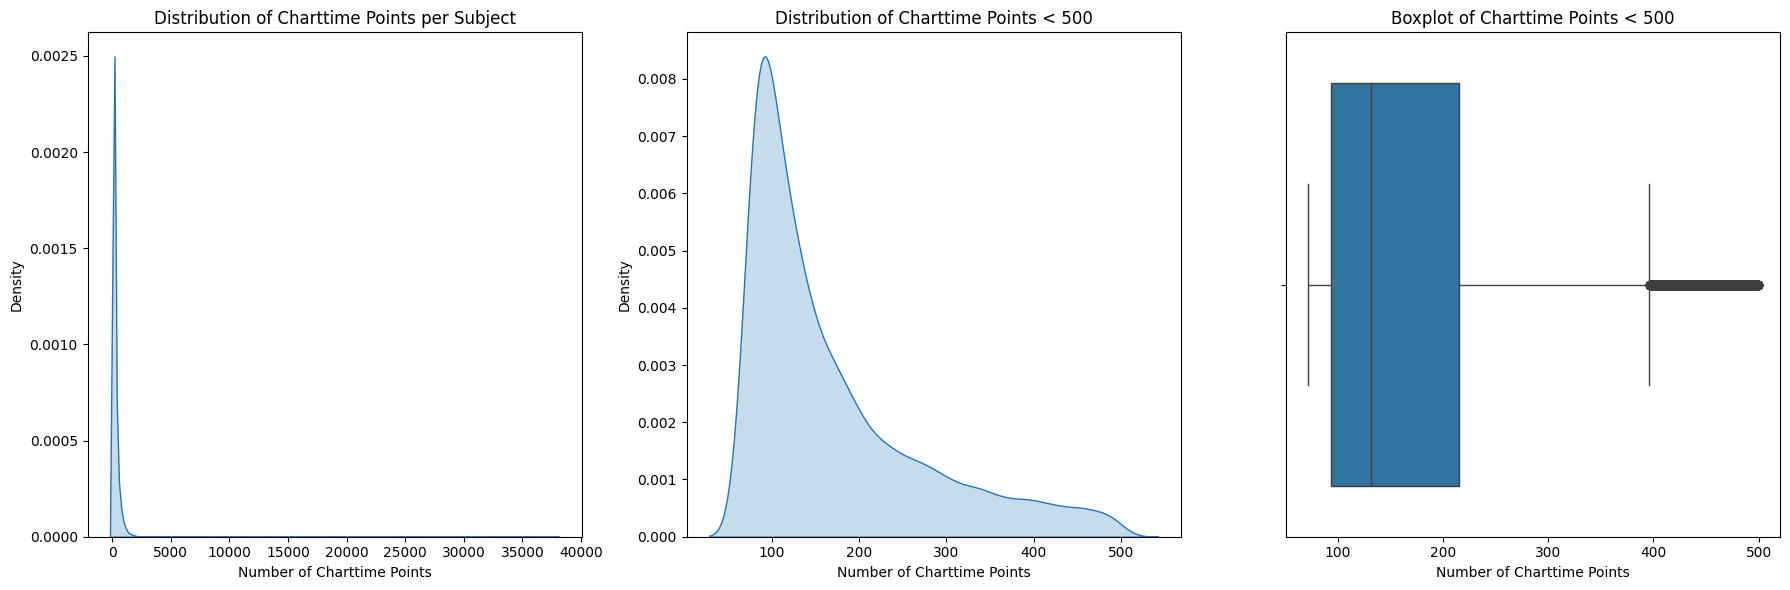

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of charttime points per subject_id
charttime_length_per_subject = df_72.groupby('subject_id')['charttime'].nunique()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First plot: Density plot for all subjects
sns.kdeplot(charttime_length_per_subject, shade=True, ax=axes[0])
axes[0].set_title('Distribution of Charttime Points per Subject')
axes[0].set_xlabel('Number of Charttime Points')
axes[0].set_ylabel('Density')

# Second plot: Density plot for subjects with < 500 charttime points
filtered_subjects = charttime_length_per_subject[charttime_length_per_subject < 500]
sns.kdeplot(filtered_subjects, shade=True, ax=axes[1])
axes[1].set_title('Distribution of Charttime Points < 500')
axes[1].set_xlabel('Number of Charttime Points')
axes[1].set_ylabel('Density')

# Third plot: Boxplot for subjects with < 500 charttime points
sns.boxplot(x=filtered_subjects, ax=axes[2])
axes[2].set_title('Boxplot of Charttime Points < 500')
axes[2].set_xlabel('Number of Charttime Points')

# Adjust layout
plt.tight_layout()
plt.savefig('hihih.png', dpi = 300)

plt.show()

<ipython-input-23-89c9e27c3c3c>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(charttime_length_per_subject, shade=True)


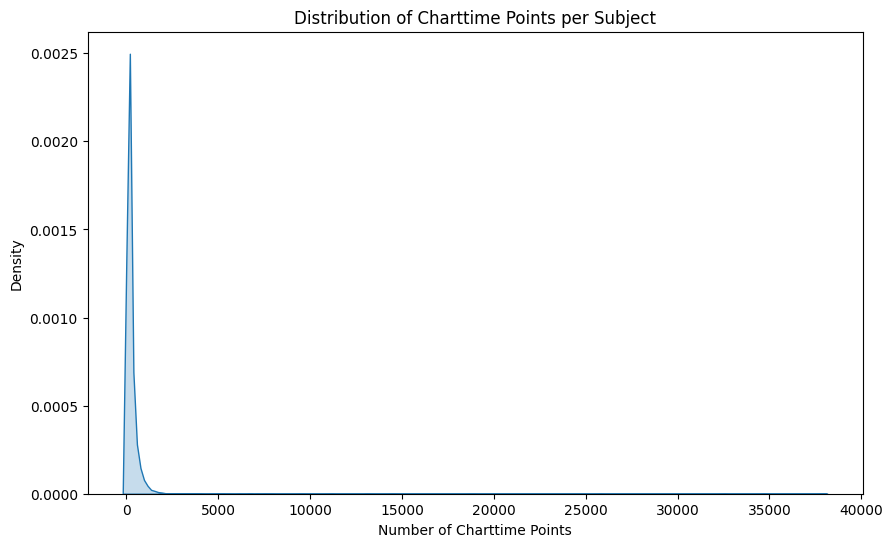

In [23]:
# Calculate the number of charttime points per subject_id
charttime_length_per_subject = df_72.groupby('subject_id')['charttime'].nunique()

# Plot the distribution as a line plot (density plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(charttime_length_per_subject, shade=True)
plt.title('Distribution of Charttime Points per Subject')
plt.xlabel('Number of Charttime Points')
plt.ylabel('Density')
plt.show()


In [ ]:
# First, order the DataFrame by 'charttime' within each 'subject_id' and 'hadm_id'
df_pandas = df_pandas.sort_values(by=['subject_id', 'hadm_id', 'charttime'])

# List of columns to interpolate
columns_to_interpolate = ['HeartRate', 'SysBP', 'DiasBP', 'MeanBP', 'RespRate', 'TempC', 'SpO2', 'Glucose']

# Group by 'subject_id' and 'hadm_id'
df_pandas[columns_to_interpolate] = df_pandas.groupby(['subject_id', 'hadm_id'])[columns_to_interpolate].transform(lambda group: group.interpolate(method='linear', axis=0))

# Fill missing values before the first available point and after the last available point
df_pandas[columns_to_interpolate] = df_pandas.groupby(['subject_id', 'hadm_id'])[columns_to_interpolate].transform(lambda group: group.ffill().bfill())

# Check the result
df_pandas.head()


,subject_id,hadm_id,charttime,HeartRate,SysBP,DiasBP,MeanBP,RespRate,TempC,SpO2,...,diagnosis,ETHNICITY,MARITAL_STATUS,RELIGION,GENDER,DOB,DOD,age,rank,age_1
610948,3,145834,2101-10-20 19:14:00,151.0,217.0,38.0,178.333351,24.0,36.488888,74.0,...,HYPOTENSION,WHITE,MARRIED,CATHOLIC,M,2025-04-11 00:00:00,2102-06-14 00:00:00,<NA>,1,76
2458592,3,145834,2101-10-20 19:15:00,151.0,217.0,38.0,178.333351,24.0,36.488888,74.0,...,HYPOTENSION,WHITE,MARRIED,CATHOLIC,M,2025-04-11 00:00:00,2102-06-14 00:00:00,<NA>,1,76
2731310,3,145834,2101-10-20 19:26:00,151.0,159.5,51.0,127.500027,24.0,36.488888,76.272727,...,HYPOTENSION,WHITE,MARRIED,CATHOLIC,M,2025-04-11 00:00:00,2102-06-14 00:00:00,<NA>,1,76
936038,3,145834,2101-10-20 19:30:00,151.0,102.0,64.0,76.666702,24.0,36.488888,78.545455,...,HYPOTENSION,WHITE,MARRIED,CATHOLIC,M,2025-04-11 00:00:00,2102-06-14 00:00:00,<NA>,1,76
4178098,3,145834,2101-10-20 19:45:00,135.0,94.0,41.0,58.666698,24.0,36.488888,80.818182,...,HYPOTENSION,WHITE,MARRIED,CATHOLIC,M,2025-04-11 00:00:00,2102-06-14 00:00:00,<NA>,1,76


In [ ]:
print(df_pandas.isnull().sum())

subject_id              0
hadm_id                 0
charttime               0
HeartRate             366
SysBP                 683
DiasBP                684
MeanBP                388
RespRate              926
TempC                5205
SpO2                 1031
Glucose              8840
admittime               0
dischtime               0
deathtime         4475152
diagnosis             113
ETHNICITY               0
MARITAL_STATUS     329317
RELIGION            66243
GENDER                  0
DOB                     0
DOD               2846410
age               1628742
rank                    0
age_1                   0
dtype: int64


In [ ]:
# Find rows with any NaN values in the specified columns
subjects_with_nulls = df_pandas[df_pandas[columns_to_interpolate].isnull().any(axis=1)]['subject_id'].unique()

# Print the subject IDs where nulls are left
print(subjects_with_nulls)


<IntegerArray>
[   63,    67,   119,   162,   176,   181,   532,   593,   617,   718,
 ...
 97922, 98167, 98273, 98474, 98597, 98802, 98943, 98957, 99207, 99417]
Length: 725, dtype: Int64


In [ ]:

df_filled = df_pandas[~df_pandas['subject_id'].isin(subjects_with_nulls)]

In [ ]:
# Fill NaNs in the 'MARITAL STATUS' and 'RELIGION' columns
df_filled['MARITAL_STATUS'].fillna('UNKNOWN (DEFAULT)', inplace=True)
df_filled['RELIGION'].fillna('NOT SPECIFIED', inplace=True)


<ipython-input-13-5bcfa34d81b4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['MARITAL_STATUS'].fillna('UNKNOWN (DEFAULT)', inplace=True)
<ipython-input-13-5bcfa34d81b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled['MARITAL_STATUS'].fillna('UNKNOWN (DEFAULT)', inplace=True)
<ipython-input-13-5bcfa34d81b4>:3: FutureWa

In [ ]:
df_filled.drop(columns = ['rank', 'age'], inplace = True)

<ipython-input-14-5cd3458082f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled.drop(columns = ['rank', 'age'], inplace = True)


In [ ]:
# Rename the column 'age_1' to 'age'
df_filled.rename(columns={'age_1': 'age'}, inplace=True)

<ipython-input-15-909b8a3105b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled.rename(columns={'age_1': 'age'}, inplace=True)


In [ ]:
print(df_filled.isnull().sum())

subject_id              0
hadm_id                 0
charttime               0
HeartRate               0
SysBP                   0
DiasBP                  0
MeanBP                  0
RespRate                0
TempC                   0
SpO2                    0
Glucose                 0
admittime               0
dischtime               0
deathtime         4466088
diagnosis             113
ETHNICITY               0
MARITAL_STATUS          0
RELIGION                0
GENDER                  0
DOB                     0
DOD               2838773
age                     0
dtype: int64


In [ ]:
df_filled.columns

Index(['subject_id', 'hadm_id', 'charttime', 'HeartRate', 'SysBP', 'DiasBP',
       'MeanBP', 'RespRate', 'TempC', 'SpO2', 'Glucose', 'admittime',
       'dischtime', 'deathtime', 'diagnosis', 'ETHNICITY', 'MARITAL_STATUS',
       'RELIGION', 'GENDER', 'DOB', 'DOD', 'age'],
      dtype='object')

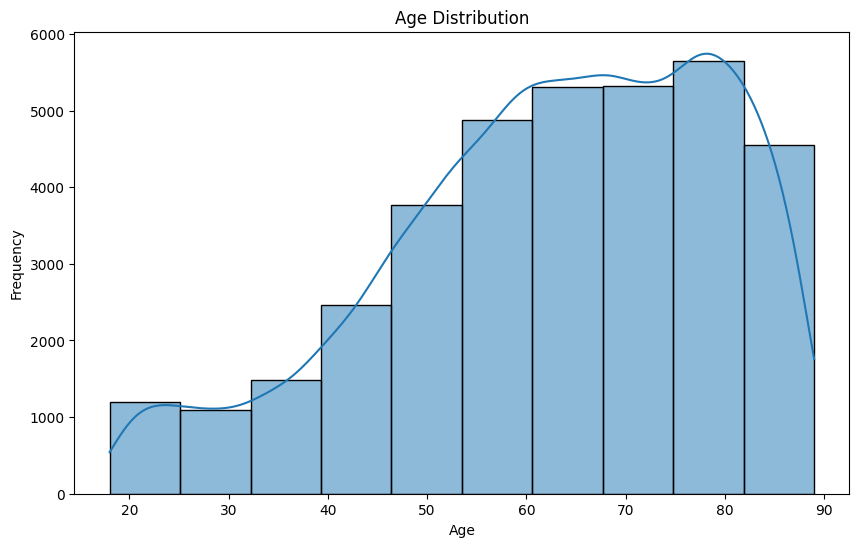

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the first available age for each subject_id
unique_ages = df_filled.groupby('subject_id')['age'].first()

# Plot the distribution of ages (each subject_id counted once)
plt.figure(figsize=(10, 6))
sns.histplot(unique_ages, kde=True, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<ipython-input-19-66abc5ea5a10>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(charttime_length_per_subject, shade=True)


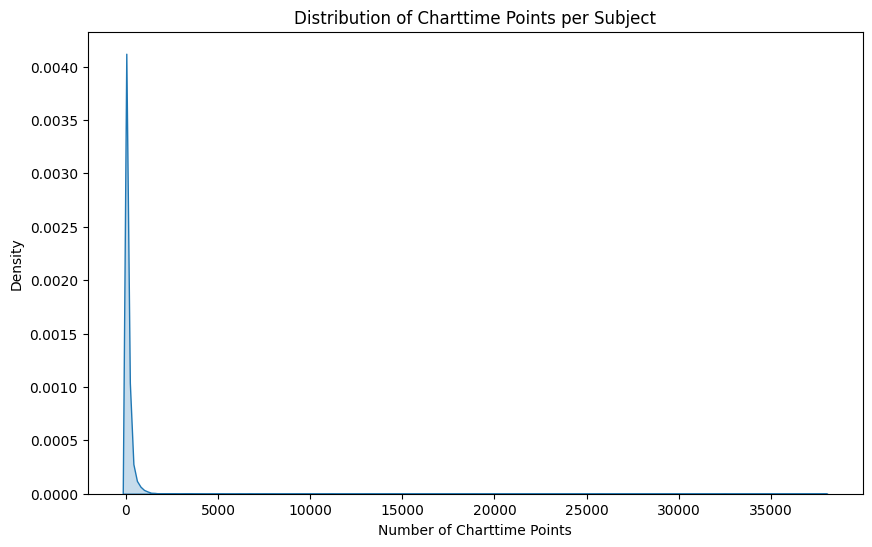

In [ ]:
# Calculate the number of charttime points per subject_id
charttime_length_per_subject = df_filled.groupby('subject_id')['charttime'].nunique()

# Plot the distribution as a line plot (density plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(charttime_length_per_subject, shade=True)
plt.title('Distribution of Charttime Points per Subject')
plt.xlabel('Number of Charttime Points')
plt.ylabel('Density')
plt.show()


In [ ]:
# Group by 'subject_id' and calculate the number of charttime points per subject
charttime_length_per_subject = df_filled.groupby('subject_id')['charttime'].count()

# Identify subjects with 24 or more charttime points
subjects_with_24_or_more = charttime_length_per_subject[charttime_length_per_subject >= 24].index

# Filter the data to include only these subjects
data_filled_filtered = df_filled[df_filled['subject_id'].isin(subjects_with_24_or_more)]

# Print the result
print(f"Filtered dataset shape: {data_filled_filtered.shape}")
print(f"Number of unique subjects remaining: {data_filled_filtered['subject_id'].nunique()}")


Filtered dataset shape: (5376912, 22)
Number of unique subjects remaining: 33360


In [ ]:
final_data = data_filled_filtered[['subject_id', 'charttime', 'HeartRate', 'SysBP',
        'RespRate',  'SpO2', 'ETHNICITY', 'MARITAL_STATUS',
       'RELIGION', 'GENDER', 'age']]

In [ ]:
final_data.to_csv('final_data_27_12.csv', index = False)

In [ ]:
import pandas as pd
data = pd.read_csv('final_data_27_12.csv')

In [ ]:
# Group by 'subject_id' and calculate the number of charttime points per subject
charttime_length_per_subject = data.groupby('subject_id')['charttime'].count()

# Identify subjects with 48 or more charttime points
subjects_with_24_or_more = charttime_length_per_subject[charttime_length_per_subject >= 24].index

# Filter the data to include only these subjects
data_filled_filtered = data[data['subject_id'].isin(subjects_with_24_or_more)]

# Print the result
print(f"Filtered dataset shape: {data_filled_filtered.shape}")
print(f"Number of unique subjects remaining: {data_filled_filtered['subject_id'].nunique()}")